In [ ]:
# ###################################
# Group ID : 741
# Members : Simon Loi Baks, Vasiliki Ismiroglou
# Date : 22/10/2023
# Lecture: Lecture 8 Multilayer Perceptrons
# Dependencies: scipy.io.loadmat, sklearn.preprocessing.StandardScaler, sklearn.discriminant_analysis.LinearDiscriminantAnalysis, sklearn.decomposition.PCA
# sklearn.neural_network.MLPClassifier, sklearn.metrics.confusion_matrix, sklearn.metrics.ConfusionMatrixDisplay, numpy, matplotlib
# Python version:3.11.6
# Functionality: Reducing dimensionality of data and performing multi-class classification using multilayer perceptron
# ###################################

In [22]:
import sys
sys.path.append('../tools/')
from functions import create_complete_datasets
from scipy.io import loadmat
import numpy as np

from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from matplotlib import pyplot as plt

In [23]:
file = "../data/mnist_all.mat"
data = loadmat(file)

#Complete training and test sets
train_set, train_targets, test_set, test_targets = create_complete_datasets(data)

In [24]:
ss = StandardScaler()
train_set = ss.fit_transform(train_set)
test_set = ss.transform(test_set)

In [25]:
pca = PCA(n_components=9, random_state=42)
train_set_pca = pca.fit_transform(train_set)
test_set_pca = pca.transform(test_set)

In [26]:
lda = LinearDiscriminantAnalysis(n_components=9)
lda.fit(train_set, train_targets)
train_set_lda = lda.transform(train_set)
test_set_lda = lda.transform(test_set)

Testing the performance of different architectures on LDA dim_reduced

In [27]:
params = [
    {'hidden_layer_sizes': (32)},
    {'hidden_layer_sizes': (64)},
    {'hidden_layer_sizes': (32, 16)},
    {'hidden_layer_sizes': (64, 32)},
    {'hidden_layer_sizes': (32, 16, 8)}
]

labels = [
    "(32)",
    "(64)",
    "(32, 16)",
    "(64, 32)",
    "(32, 16, 8)",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"}
]

In [37]:
mlps = []
print('\nlearning on MNIST digit dataset')
for label, param in zip(labels, params):
    print("training: %s" % label)
    mlp = MLPClassifier(random_state=42, early_stopping = True, validation_fraction=0.2, **param)

    # some parameter combinations will not converge as can be seen on the
    # plots so they are ignored here
    mlp.fit(train_set_lda, train_targets)

    mlps.append(mlp)
    print("Training set score: %f" % mlp.score(train_set_lda, train_targets))
    print("Training set loss: %f" % mlp.loss_)


learning on MNIST digit dataset
training: (32)
Training set score: 0.917100
Training set loss: 0.263579
training: (64)
Training set score: 0.917783
Training set loss: 0.258441
training: (32, 16)
Training set score: 0.918567
Training set loss: 0.258953
training: (64, 32)
Training set score: 0.927450
Training set loss: 0.219768
training: (32, 16, 8)
Training set score: 0.915950
Training set loss: 0.273362


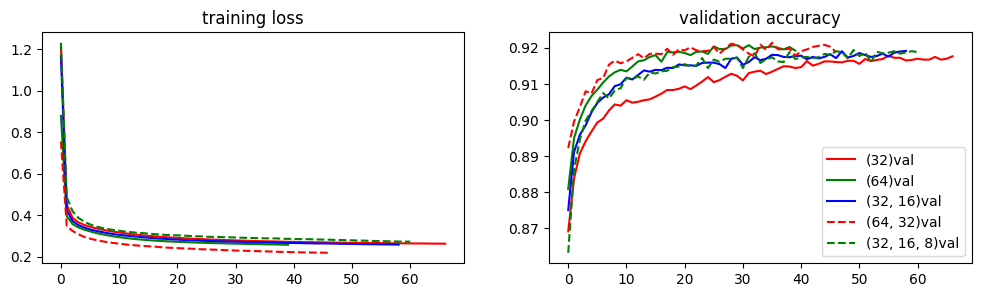

In [44]:
figure = plt.figure(figsize=(12, 3))
for mlp, label, args in zip(mlps, labels, plot_args):
    plt.subplot(1,2,1)
    plt.plot(mlp.loss_curve_, label=label, **args)
    plt.title('training loss')
    plt.subplot(1,2,2)
    plt.plot(mlp.validation_scores_, label=(label + 'val'), **args)
    plt.title('validation accuracy')

plt.legend()
plt.show()    

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mlp = MLPClassifier(random_state=42, early_stopping = True, validation_fraction=0.2, hidden_layer_sizes=(64))
mlp.fit(train_set_pca, train_targets)
cm_pca = confusion_matrix(test_targets, mlp.predict(test_set_pca))

mlp.fit(train_set_lda, train_targets)
cm_lda = confusion_matrix(test_targets, mlp.predict(test_set_lda))

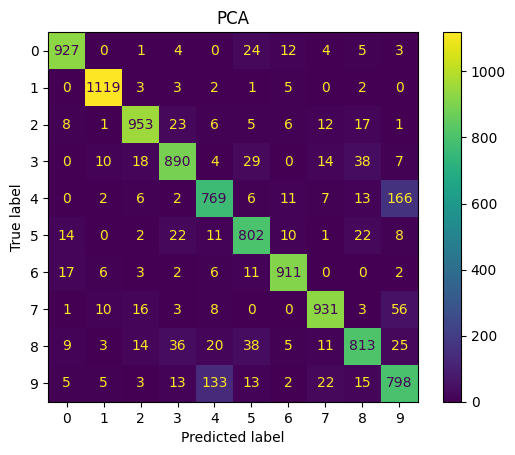

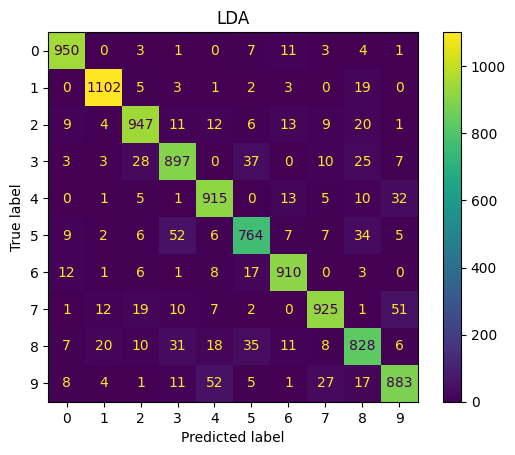

In [36]:

disp1 = (ConfusionMatrixDisplay(cm_pca))
disp1.plot()
plt.title('PCA')

disp2 = (ConfusionMatrixDisplay(cm_lda))
disp2.plot()
plt.title('LDA')
plt.show()